# Project2 Analyze titanic data 

## 1. Read the data set. 

In [41]:
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [42]:

titanic  = pd.read_csv("titanic_data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Clean Data

In [43]:
print("There is %d data"%len(titanic.index))

null_number = titanic['PassengerId'].isnull().sum()
print("PassengerId exist %d null values"%null_number)

null_number = titanic['Survived'].isnull().sum()
print("Survived exist %d null values"%null_number)

null_number = titanic['Pclass'].isnull().sum()
print("Pclass exist %d null values"%null_number)

null_number = titanic['Name'].isnull().sum()
print("Name exist %d null values"%null_number)

null_number = titanic['Sex'].isnull().sum()
print("Sex exist %d null values"%null_number)

null_number = titanic['Age'].isnull().sum()
print("Age exist %d null values"%null_number)

null_number = titanic['SibSp'].isnull().sum()
print("SibSp exist %d null values"%null_number)

null_number = titanic['Parch'].isnull().sum()
print("Parch exist %d null values"%null_number)

null_number = titanic['Ticket'].isnull().sum()
print("Ticket exist %d null values"%null_number)

null_number = titanic['Fare'].isnull().sum()
print("Fare exist %d null values"%null_number)

null_number = titanic['Cabin'].isnull().sum()
print("Cabin exist %d null values"%null_number)

null_number = titanic['Embarked'].isnull().sum()
print("PEmbarked exist %d null values"%null_number)

There is 891 data
PassengerId exist 0 null values
Survived exist 0 null values
Pclass exist 0 null values
Name exist 0 null values
Sex exist 0 null values
Age exist 177 null values
SibSp exist 0 null values
Parch exist 0 null values
Ticket exist 0 null values
Fare exist 0 null values
Cabin exist 687 null values
PEmbarked exist 2 null values


From the result, we can see most feature don't have null value. Most Cabin data are missing.
1.For "Age", I decide to set the NUll value to mean of other value.
2.For"PEmbarked", since there are only 2 missing value. I deicde to delete this two rows.
3.For "Cabin", it's not very important for our question by now, I decide to set null value to 0.

In [44]:
clean_titanic = titanic

clean_titanic[['Age']] = titanic[['Age']].fillna(titanic[['Age']].mean())
clean_titanic[['Cabin']] = titanic[['Cabin']].fillna(0)
clean_titanic=clean_titanic.dropna(axis=0)
clean_titanic.head()
null_number = clean_titanic['Embarked'].isnull().sum()


## 3.Age

In [45]:
age_data = clean_titanic[['Age','Survived','Sex']]

Let's plot histogram first:

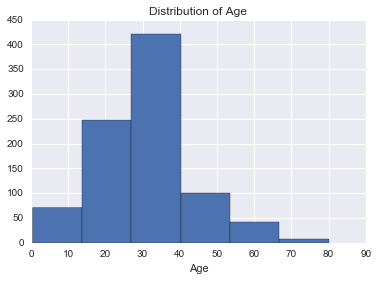

In [46]:

plt.hist(age_data['Age'],bins=6)
plt.title('Distribution of Age')
plt.xlabel('Age')

This figure tell us 'Age' in the dataset is close to norm distribution. Thus, we can use t-test to verify our conclusion later. The second step is draw boxplot for 'Age'

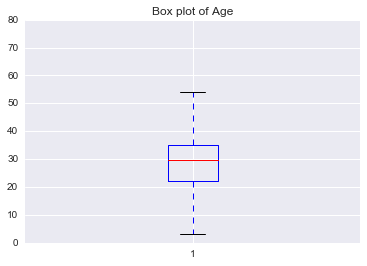

In [47]:

plt.boxplot(age_data['Age'])
plt.title('Box plot of Age')

This figure tell us most people's age are near 22-35.
The third part of our analyze is to figure out how many people survived for different age range. Every 18 years old will be different group.

In [67]:
age_count = age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18)))[['Age']].count()
age_survived =  age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18)))[['Survived']].sum()
#print(age_count)
#print(age_survived)
age_count_survived = pd.concat([age_count,age_survived],axis=1, join_axes=[age_count.index])

age_count_survived.columns=['Total numbers','Survived numbers']
age_count_survived

,Total numbers,Survived numbers
Age,,
"(0, 18]",139,70
"(18, 36]",557,200
"(36, 54]",152,58
"(54, 72]",39,11


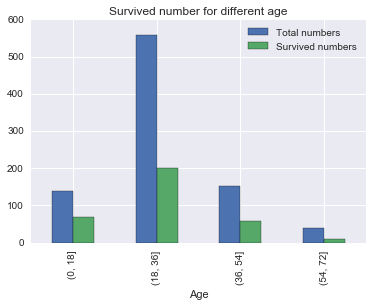

In [49]:
age_count_survived.plot(kind='bar')
plt.title('Survived number for different age')

We can see clearly from this picture that the number and survived people of different age range.

Then, we would like to see whether 'Sex' affect distribution of our data. We want to know if there is not specific distribution of gender for different Age group.

In [50]:
one = age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18))).get_group('(0, 18]').groupby('Sex').count()['Age']
two =age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18))).get_group('(18, 36]').groupby('Sex').count()['Age']
three=age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18))).get_group('(36, 54]').groupby('Sex').count()['Age']
four=age_data.groupby(pd.cut(age_data['Age'],np.arange(0,age_data['Age'].max(),18))).get_group('(54, 72]').groupby('Sex').count()['Age']
two



Sex
female    180
male      377
Name: Age, dtype: int64

In [51]:
sex = { '(0, 18]':one.values, '(18, 36]':two.values, '(36, 54]':three.values, '(54, 72]':four.values}
sex_df = pd.DataFrame(sex,index=['female','male']).transpose()
sex_df 

,female,male
"(0, 18]",68,71
"(18, 36]",180,377
"(36, 54]",55,97
"(54, 72]",9,30


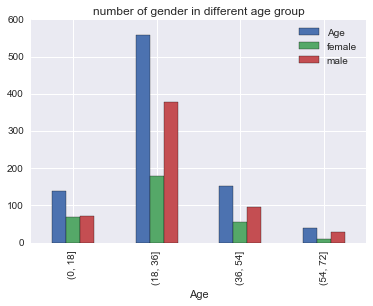

In [52]:
age_sex_count = pd.concat([age_count,sex_df],axis=1)
age_sex_count.plot(kind='bar')
plt.title('number of gender in different age group')

In [66]:
age_sex_count.columns= ['total','female','male']
age_sex_count

,total,female,male
Age,,,
"(0, 18]",139,68,71
"(18, 36]",557,180,377
"(36, 54]",152,55,97
"(54, 72]",39,9,30


In [86]:
non_survived = age_count_survived['Total numbers'].values -age_count_survived['Survived numbers'].values
survived = age_count_survived['Survived numbers'].values
pivot = pd.DataFrame({"Survived":survived,"Non-survived":non_survived},index=['(0, 18]','(18, 36]','(36, 54]','(54, 72]']).transpose()

pivot

,"(0, 18]","(18, 36]","(36, 54]","(54, 72]"
Non-survived,69,357,94,28
Survived,70,200,58,11


In [88]:
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 11.5948774937
Pvalue = 0.00890798586255




## Fare

In [54]:
fare_data= clean_titanic[['Survived','Fare','Pclass','Sex']]
fare_data.describe()

,Survived,Fare,Pclass
count,889.000000,889.000000,889.000000
mean,0.382452,32.096681,2.311586
std,0.486260,49.697504,0.834700
min,0.000000,0.000000,1.000000
25%,0.000000,7.895800,2.000000
50%,0.000000,14.454200,3.000000
75%,1.000000,31.000000,3.000000
max,1.000000,512.329200,3.000000


First of all, let's explore single data: Fare. We need to plot both histogram and boxplot.

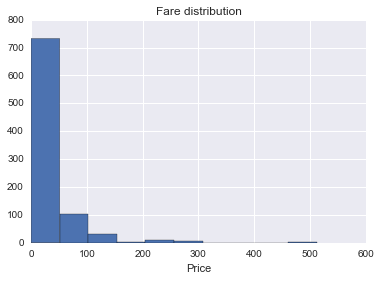

In [55]:
fare = fare_data['Fare']
plt.hist(fare)
plt.title('Fare distribution')
plt.xlabel('Price')

It's not clear due to some overhigh data, we need to limit the value

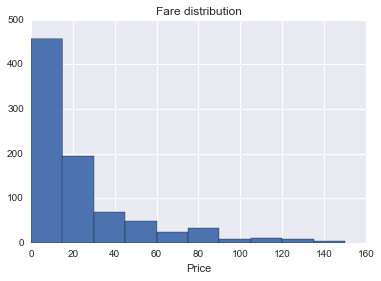

In [56]:
plt.hist(fare,range=(0,150))
plt.title('Fare distribution')
plt.xlabel('Price')

Much better, but we should remember the data we cut. Then boxplot.

{'boxes': [<matplotlib.lines.Line2D at 0xd459320>],
 'caps': [<matplotlib.lines.Line2D at 0xd459f98>,
 'fliers': [<matplotlib.lines.Line2D at 0xd477080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd469ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd459438>,
  <matplotlib.lines.Line2D at 0xd459a20>]}

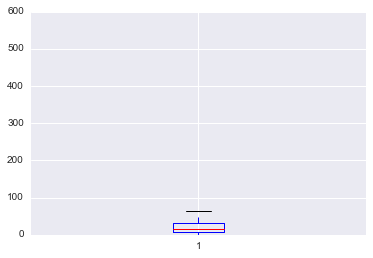

In [57]:
plt.boxplot(fare)

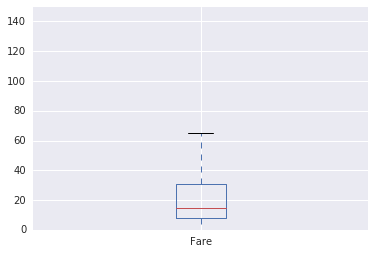

In [114]:
fare.plot.box(ylim=(0,150))

Then we would like to see the relationship between different Pclass and Fare.

(0, 150)

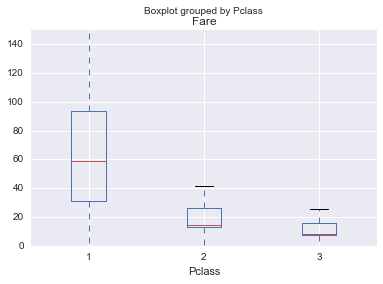

In [60]:
fare_data.boxplot(column='Fare',by='Pclass').set_ylim(0,150)

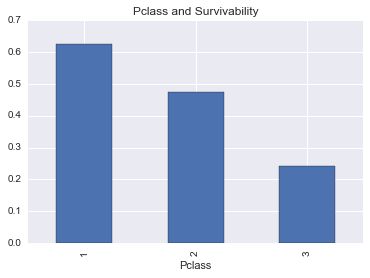

In [61]:
pclass_data = fare_data[['Pclass','Survived','Sex']]
pclass_data.groupby('Pclass')['Survived'].mean().plot(kind='bar',title='Pclass and Survivability')

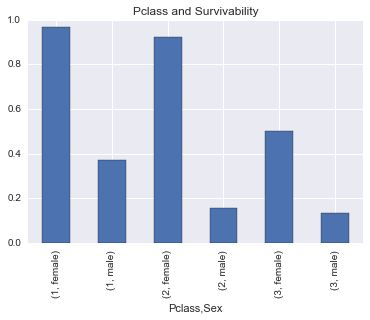

In [33]:
pclass_data.groupby(['Pclass','Sex'])['Survived'].mean().plot(kind='bar',title='Pclass and Survivability')

In [73]:
a = pd.DataFrame(pclass_data.groupby(['Pclass','Sex'])['Survived'].mean())
a.columns=['survivability']
a

survivability
Pclass Sex                  
1      female       0.967391
       male         0.368852
2      female       0.921053
       male         0.157407
3      female       0.500000
       male         0.135447

In [93]:
pivot = pd.pivot_table(data = fare_data[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
pivot

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


In [92]:
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 100.980407261
Pvalue = 1.18136247855e-22


